In [227]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from string import punctuation
from sklearn import svm
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import ngrams
from itertools import chain



In [226]:

df = pd.read_excel(r'C:\Users\Yoyo2018\Downloads\Reviews.xlsx')

df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [65]:
df['Helpful %'] = np.where(df['HelpfulnessDenominator'] > 0,
    df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'], -1)
   
df['% Upvote'] = pd.cut(df['Helpful %'], 
                bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], 
                labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'], 
                include_lowest = True)


In [20]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,% Upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,Empty
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,Empty


Text(0.5, 1.0, 'User Scores to a product')

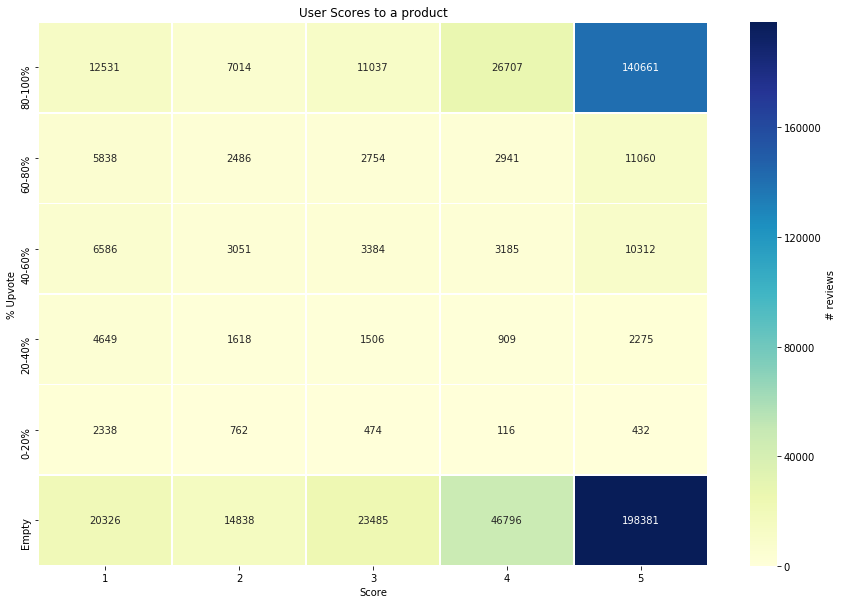

In [25]:
df_s = df.groupby(['Score', df['% Upvote']]).agg({'Id': 'count'})

df_s = df_s.unstack()

df_s.columns = df_s.columns.get_level_values(1)

fig = plt.figure(figsize=(15,10))

sns.heatmap(df_s[df_s.columns[::-1]].T,
            cmap = 'YlGnBu', linewidths=.5, 
            annot = True, 
            fmt = 'd', 
            cbar_kws={'label': '# reviews'})

plt.title('User Scores to a product')

In [ ]:
#clearly the majority agrees to most products

In [29]:
dff = df[df['Score'] != 3]
X = dff['Text']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = dff['Score'].map(y_dict)

In [ ]:
# here I'm gonna create a logistic regression based on word count

In [31]:
c = CountVectorizer(stop_words = 'english')

def text_fit(X, y, model,clf_model,coef_show=1):
    
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    
    print('# train records: {}'.format(X_train.shape[0]))
    
    print('# test records: {}'.format(X_test.shape[0]))
    
    clf = clf_model.fit(X_train, y_train)
    
    acc = clf.score(X_test, y_test)
    
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_dff = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_dff = coeff_dff.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_dff.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_dff.tail(20).to_string(index=False))
        
text_fit(X, y, c, LogisticRegression()).head()

# features: 115174
# train records: 394360
# test records: 131454


C:\Users\Yoyo2018\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Model Accuracy: 0.9388074915940177

-Top 20 positive-
          Word  Coefficient
    pleasantly     3.332151
 emeraldforest     3.231008
       chedder     3.079679
       easiest     2.567075
       blowout     2.479314
       solving     2.467143
      heartier     2.381478
     addicting     2.374929
        skewed     2.341436
         herrs     2.324085
    unwrapping     2.314417
      drawback     2.297265
        hooked     2.291893
        hahaha     2.267351
    correction     2.260213
      downside     2.248970
         whisk     2.216052
        bertie     2.206365
        ration     2.201216
    dishwasher     2.175165

-Top 20 negative-
          Word  Coefficient
         snail    -2.472521
      tastless    -2.497631
       weakest    -2.616788
     overrated    -2.635687
     cancelled    -2.694697
   unappealing    -2.736729
       furious    -2.754437
    oversalted    -2.755636
     deceptive    -2.822644
 disappointing    -2.822706
   undrinkable    -2.828761
   

In [ ]:
#the data above shows almost 93.9%, I personally think its a bit too high,
#but there also meaningless coeffecients like 280mg
#+ Python kept crashing 

#the below is testing the base line accuracy (in this case: positive class)

In [33]:
text_fit(X, y, c, DummyClassifier(),0)

# features: 115174
# train records: 394360
# test records: 131454
Model Accuracy: 0.7349719293441052


In [ ]:
#Logistic regression model on TFIDF

In [37]:
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

# features: 115174
# train records: 394360
# test records: 131454
Model Accuracy: 0.9346691618360795

-Top 20 positive-
       Word  Coefficient
      great    13.721122
  delicious    12.148438
       best    12.015490
    perfect    10.603325
  excellent     9.860514
      loves     9.578695
     highly     9.036584
       love     8.362881
  wonderful     7.965320
    amazing     7.797344
    awesome     7.632912
       good     7.338357
 pleasantly     7.246608
       nice     7.190698
     hooked     7.019660
      yummy     6.956454
   favorite     6.940349
    pleased     6.929977
     smooth     6.885866
  fantastic     6.728023

-Top 20 negative-
           Word  Coefficient
          waste    -5.623952
           poor    -5.720653
    undrinkable    -5.724576
           yuck    -6.012426
          stale    -6.153028
          worse    -6.276960
          bland    -6.320257
     disgusting    -6.551652
           weak    -6.559340
         return    -6.689784
          threw  

In [ ]:
#we notice that the significant words make much more sense now,
#and hire coeffecient magnitude

#We will be focusing on score 5 reviews, 
#and get rid of comments with neutral vote
#Objective is to boost sales

In [38]:
dff = dff[dff['Score'] == 5]
dff = dff[dff['% Upvote'].isin(['0-20%', '20-40%', '60-80%', '80-100%'])]
dff.shape

X = dff['Text']
y_dict = {'0-20%': 0, '20-40%': 0, '60-80%': 1, '80-100%': 1}
y = dff['% Upvote'].map(y_dict)

print('Class distribution:')
print(y.value_counts())

Class distribution:
1    151721
0      2707
Name: % Upvote, dtype: int64


In [39]:
df_s = pd.DataFrame(data = [X,y]).T

Downvote_records = len(df_s[df_s['% Upvote'] == 0])
Downvote_indices = np.array(df_s[df_s['% Upvote'] == 0].index)

Upvote_indices = df_s[df_s['% Upvote'] == 1].index

random_upvote_indices = np.random.choice(Upvote_indices, Downvote_records, replace = False)
random_upvote_indices = np.array(random_upvote_indices)

under_sample_indices = np.concatenate([Downvote_indices,random_upvote_indices])

under_sample_data = df_s.ix[under_sample_indices, :]
X_u = under_sample_data['Text']
under_sample_data['% Upvote'] = under_sample_data['% Upvote'].astype(int)
y_u = under_sample_data['% Upvote']


print("Percentage of upvote transactions: ", 
      len(under_sample_data[under_sample_data['% Upvote'] == 1])/len(under_sample_data))
print("Percentage of downvote transactions: ", 
      len(under_sample_data[under_sample_data['% Upvote'] == 0])/len(under_sample_data))
print("Total number of records in resampled data: ", 
      len(under_sample_data))

Percentage of upvote transactions:  0.5
Percentage of downvote transactions:  0.5
Total number of records in resampled data:  5414


C:\Users\Yoyo2018\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


In [40]:
c = CountVectorizer(stop_words = 'english')

text_fit(X_u, y_u, c, LogisticRegression())

# features: 15887
# train records: 4060
# test records: 1354
Model Accuracy: 0.707533234859675

-Top 20 positive-
         Word  Coefficient
     quantity     1.586899
         thai     1.394134
         sooo     1.288332
 discontinued     1.267847
     cherries     1.212032
       option     1.081713
       longer     1.069430
       keurig     1.066437
     cheapest     1.065360
      dessert     1.048614
        share     1.023855
         kick     1.023476
     cinnamon     1.023234
         teas     0.996236
        small     0.987965
       single     0.984999
        point     0.983636
       bitter     0.970839
          fix     0.965886
      contain     0.961730

-Top 20 negative-
       Word  Coefficient
      purse    -0.980305
    package    -0.988605
      offer    -0.995447
         24    -1.001491
    cleanse    -1.053518
     choice    -1.072667
   brooklyn    -1.073505
   mountain    -1.094459
       look    -1.094496
     lipton    -1.147274
     awhile    -1.148736


In [ ]:
#well this is not efficient the accuracy is way lower
#and the words are insignificant

#it should results the same or slight difference in accuracy 
#but using regression model on TFIDF can possible make it better

In [41]:
tfidf_n = TfidfVectorizer(stop_words = 'english')

text_fit(X_u, y_u, tfidf_n, LogisticRegression())

# features: 15887
# train records: 4060
# test records: 1354
Model Accuracy: 0.7193500738552437

-Top 20 positive-
      Word  Coefficient
      food     1.968841
     small     1.800621
      make     1.729364
    gluten     1.628911
   perfect     1.590768
 wonderful     1.553832
     bread     1.423860
    longer     1.408856
  cinnamon     1.368663
     large     1.329772
      rice     1.323003
      case     1.314787
  quantity     1.286310
    flavor     1.282924
       lot     1.279441
    keurig     1.245146
      bold     1.237485
   minutes     1.225955
     white     1.225683
       dog     1.196113

-Top 20 negative-
       Word  Coefficient
      wrong    -1.171635
     reason    -1.174969
       wish    -1.227951
      cause    -1.237674
    cleanse    -1.238757
       know    -1.250945
       yoga    -1.267638
       zico    -1.348468
    package    -1.357874
     seller    -1.373401
       look    -1.381671
     thanks    -1.423873
     lipton    -1.493680
   products 

In [ ]:
#No significatnt changes and words dont make sense

#I will test non-context features and hope they work

In [42]:
print('Downvote score 5 comments examples:')
print(under_sample_data[under_sample_data['% Upvote']==0]['Text'].iloc[:100:20])
print('Upvote score 5 comments examples')
print(under_sample_data[under_sample_data['% Upvote']==1]['Text'].iloc[:100:20])

Downvote score 5 comments examples:
207      Hard to find the wintergreen smalls [sugar fre...
4511     Wonderful, smooth, satisfying decaf coffee wit...
7787     My husband is a big coffee drinker, and with a...
12072    We love French roast coffee and my husband mus...
13671    THIS IS A LOVELY VERY HEALTHY TREE,ALONG WITH ...
Name: Text, dtype: object
Upvote score 5 comments examples
547271    This mouse mix is great for everyday desert; o...
394431    I was a little confused by seeing a "bottle" o...
123215    After a lengthy trek in the Himalayan Range, t...
492800    In our house, the relish tray gets a lot of at...
340708    This shipment arrived carrying the the eggs, a...
Name: Text, dtype: object


In [43]:
under_sample_data['word_count'] = under_sample_data['Text'].apply(lambda x: len(x.split()))
under_sample_data['capital_count'] = under_sample_data['Text'].apply(lambda x: sum(1 for c in x if c.isupper()))
under_sample_data['question_mark'] = under_sample_data['Text'].apply(lambda x: sum(1 for c in x if c == '?'))
under_sample_data['exclamation_mark'] = under_sample_data['Text'].apply(lambda x: sum(1 for c in x if c == '!'))
under_sample_data['punctuation'] = under_sample_data['Text'].apply(lambda x: sum(1 for c in x if c in punctuation))

print(under_sample_data.groupby('% Upvote').agg({'word_count': 'mean', 'capital_count': 'mean', 'question_mark': 'mean', 'exclamation_mark': 'mean', 'punctuation': 'mean'}).T)

X_num = under_sample_data[under_sample_data.columns.difference(['% Upvote', 'Text'])]
y_num = under_sample_data['% Upvote']

% Upvote                  0          1
word_count        83.927226  86.214259
capital_count     19.252678  13.799040
question_mark      0.180273   0.069080
exclamation_mark   0.906169   0.947543
punctuation       22.482822  18.994089


In [ ]:
# now that we have extracted some possible features, 
#we can train the model to predict

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_num, y_num, random_state=0)

clf_lr = LogisticRegression().fit(X_train, y_train)
acc_lr = clf_lr.score(X_test, y_test)
print('Logistic Regression accuracy: {}'.format(acc_lr))

clf_svm = svm.SVC().fit(X_train, y_train)
acc_svm = clf_svm.score(X_test, y_test)
print('SVM accuracy: {}'.format(acc_svm))

Logistic Regression accuracy: 0.5805022156573116


C:\Users\Yoyo2018\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM accuracy: 0.6632200886262924


In [49]:
# the accuracy has dropped by 25% so we cant predict or get useful features

"""This analysis will be carried out to focus on one specific user, 
on what the user likes in terms of fine food, 
based on the reviews this user had given in the past. 
This can be expanded to all users later on."""


'This analysis will be carried out to focus on one specific user, \non what the user likes in terms of fine food, \nbased on the reviews this user had given in the past. \nThis can be expanded to all users later on.'

In [212]:
df_user = df.groupby(['UserId']).agg({'Score': ['count','mean']})
df_user.columns = df_user.columns.get_level_values(1)
df_user.columns = ['Score count', 'Score mean']
df_user = df_user.sort_values(by = 'Score count', ascending = False)
print(df_user.head(10))

                Score count  Score mean
UserId                                 
A3OXHLG6DIBRW8          448    4.535714
A1YUL9PCJR3JTY          421    4.494062
AY12DBB0U420B           389    4.647815
A281NPSIMI1C2R          365    4.841096
A1Z54EM24Y40LL          256    4.453125
A1TMAVN4CEM8U8          204    4.833333
A2MUGFV2TDQ47K          201    3.751244
A3TVZM3ZIXG8YW          199    1.000000
A3PJZ8TU8FDQ1K          178    4.601124
AQQLWCMRNDFGI           176    3.954545


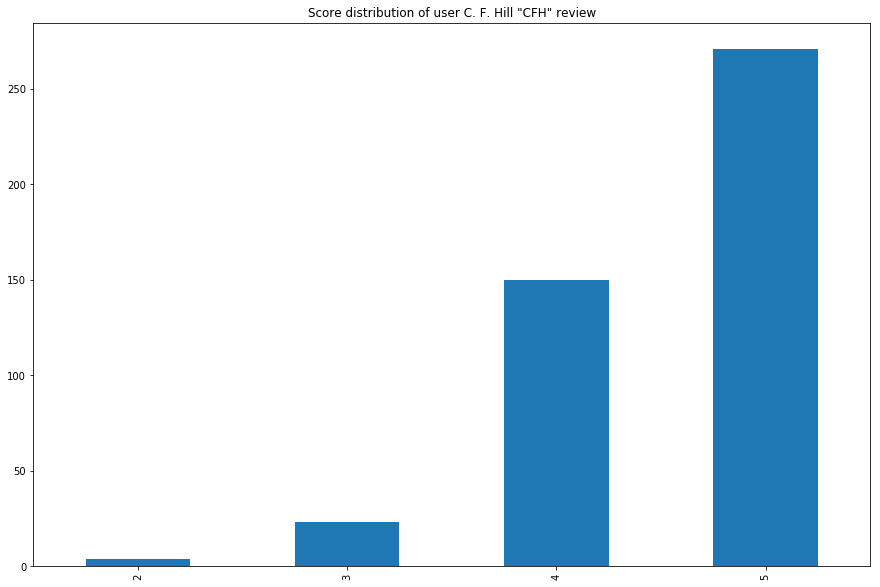

In [96]:
#the average score is 4.54 approximately with 448 reviews

def plot_user(UserId):
    df_1user = df[df['UserId'] == UserId]['Score']
    df_1user_plot = df_1user.value_counts(sort=False)
    ax = df_1user_plot.plot(kind = 'bar', figsize = (15,10), title = 'Score distribution of user {} review'.format(df[df['UserId'] == UserId]['ProfileName'].iloc[0]))

plot_user('A3OXHLG6DIBRW8')

In [97]:
print(df_user[(df_user['Score mean']<3.5) 
     & 
    (df_user['Score mean']>2.5)].head())

                Score count  Score mean
UserId                                 
A35R32TA60XD57          141    3.460993
A2M9D9BDHONV3Y          115    3.269565
A2TN9C5E4A0I3F          110    2.727273
A2XNJJ9TF70P4J           85    2.976471
AJB5P7GVR0MT8            70    3.257143


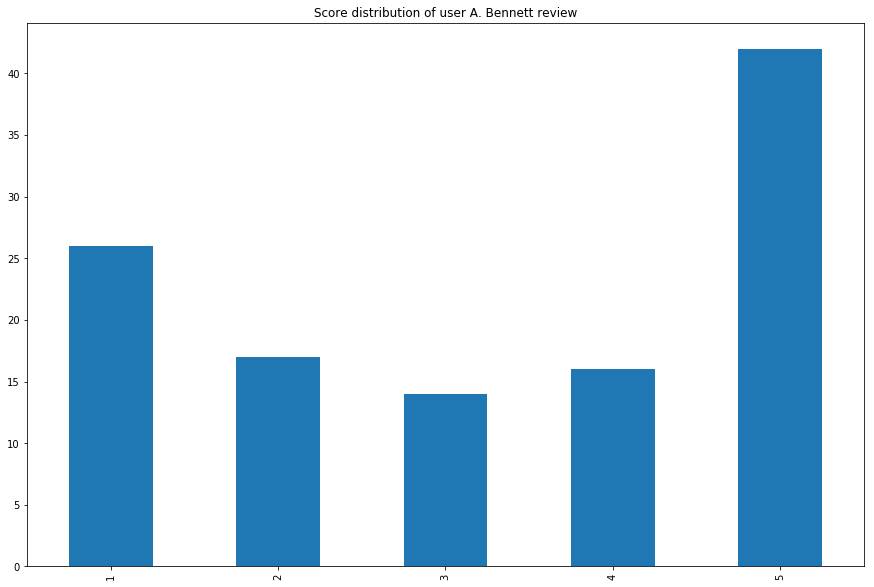

In [98]:
plot_user('A2M9D9BDHONV3Y')

In [ ]:
# We choose him because he seemed a better analysis target

In [243]:
def GTN(score, benchmark, userid='all'):

    if userid != 'all':
        dff = df[(df['UserId'] == userid) & (df['Score'] == score)]['Text']
    else:
        dff = df[df['Score'] == score]['Text']
        
    count = len(dff)
    total_text = ' '.join(dff)
    total_text = total_text.lower()
    stop = set(stopwords.words('english'))
    total_text = nltk.word_tokenize(total_text)
    total_text = [word for word in total_text if word not in stop and len(word) >= 3]
    lemmatizer = WordNetLemmatizer()
    total_text = [lemmatizer.lemmatize(w,'v') for w in total_text]
    bigrams = ngrams(total_text,2)
    trigrams = ngrams(total_text, 3)

    # look at 2-gram and 3-gram together
    combine = chain(bigrams, trigrams)
    text = nltk.Text(combine)
    fdist = nltk.FreqDist(text)
    
    # return only phrase occurs more than benchmark of his reviews
    return sorted([(w,fdist[w],str(round(fdist[w]/count*100,2))+'%') for w in set(text) 
                   if fdist[w] >= count*benchmark], key=lambda x: -x[1])

In [246]:
index = ['Phrase', 'Count', 'Occur %']

for j in range(1,6):
    test = pd.DataFrame()
    d = GTN(j, 0.25, 'A2M9D9BDHONV3Y')
    print('score {} reviews most popular:'.format(j))
    for i in d:
        test = test.append(pd.Series(i, index = index), ignore_index = True)
        test = test.sort_values('Count', ascending=False)
    print(test)

score 1 reviews most popular:
   Count  Occur %                   Phrase
0   31.0  119.23%               (..., ...)
1   17.0   65.38%          (..., ..., ...)
2   11.0   42.31%             (never, buy)
3    9.0   34.62%           (buy, product)
4    8.0   30.77%    (never, buy, product)
5    8.0   30.77%  (monosodium, glutamate)
6    7.0   26.92%            (decide, try)
7    7.0   26.92%         (dry, tasteless)
8    7.0   26.92%          (picture, look)
score 2 reviews most popular:
    Count Occur %                Phrase
0     8.0  47.06%  (sauce, ruin, whole)
1     8.0  47.06%         (sauce, ruin)
2     8.0  47.06%         (ruin, whole)
3     6.0  35.29%       (product, ever)
4     6.0  35.29%            (n't, buy)
5     5.0  29.41%     (n't, get, wrong)
6     5.0  29.41%     (buy, particular)
7     5.0  29.41%          (get, wrong)
8     5.0  29.41%    (.give, try, like)
9     5.0  29.41%          (.give, try)
10    5.0  29.41%     (..., .give, try)
11    5.0  29.41%          (..

In [248]:
index = ['Phrase', 'Count', 'Occur %']

for j in range(1,6):
    test = pd.DataFrame()
    d = GTN(j, 0.03)
    print('score {} reviews most popular:'.format(j))
    for i in d:
        test = test.append(pd.Series(i, index = index), ignore_index = True)
    test = test.sort_values('Count', ascending=False)
    print(test)

score 1 reviews most popular 2-gram / 3-gram:
    Count Occur %          Phrase
0  5536.0  10.59%   (taste, like)
1  2316.0   4.43%  (waste, money)
2  2175.0   4.16%    (could, n't)
3  2111.0   4.04%     (n't, even)
4  1809.0   3.46%     (n't, know)
5  1794.0   3.43%    (would, n't)
6  1644.0   3.15%      (n't, buy)
score 2 reviews most popular 2-gram / 3-gram:
    Count Occur %          Phrase
0  3161.0  10.62%   (taste, like)
1  1361.0   4.57%     (n't, like)
2  1304.0   4.38%    (would, n't)
3  1086.0   3.65%  (think, would)
4  1064.0   3.57%      (n't, buy)
5  1009.0   3.39%     (n't, know)
6   996.0   3.35%    (n't, taste)
7   945.0   3.17%    (could, n't)
8   910.0   3.06%   (taste, good)
score 3 reviews most popular 2-gram / 3-gram:
    Count Occur %          Phrase
0  3237.0   7.59%   (taste, like)
1  1632.0   3.83%    (would, n't)
2  1612.0   3.78%     (n't, like)
3  1551.0   3.64%   (taste, good)
4  1462.0   3.43%   (href=, http)
5  1406.0    3.3%     (n't, know)
6  1295.0   

In [ ]:
#these are not much useful discoveries except positive / negative tones, 
#since people are very different in texting style
#but I will rather simplify it to more of adj like tasty, good, bad, etc.

In [256]:
def adj(score, benchmark, userid='all'):
    
    if userid != 'all':
        dff = df[(df['UserId'] == userid) & (df['Score'] == score)]['Text']
    else:
        dff = df[df['Score'] == score]['Text']
        
    count = len(dff)
    total_text = ' '.join(dff)
    total_text = total_text.lower()
    stop = set(stopwords.words('english'))
    total_text = nltk.word_tokenize(total_text)
    total_text = [word for word in total_text if word not in stop and len(word) >= 3]
    lemmatizer = WordNetLemmatizer()
    total_text = [lemmatizer.lemmatize(w,'a') for w in total_text]
    # get adjective only
    total_text = [word for word, form in nltk.pos_tag(total_text) if form == 'JJ']
    
    text = nltk.Text(total_text)
    fdist = nltk.FreqDist(text)
    
    # return only phrase occurs more than benchmark
    return sorted([(w,fdist[w],str(round(fdist[w]/count*100,2))+'%') for w in set(text) if fdist[w] >= count*benchmark], key=lambda x: -x[1])

In [257]:
index = ['Phrase', 'Count', 'Occur %']

for j in range(1,6):
    test = pd.DataFrame()
    d = adj(j, 0.25, 'A2M9D9BDHONV3Y')
    print('score {} reviews most popular adjectives word:'.format(j))
    for i in d:
        test = test.append(pd.Series(i, index = index), ignore_index = True)
    test = test.sort_values('Count', ascending=False)
    print(test)

score 1 reviews most popular adjectives word:
   Count Occur %     Phrase
0   13.0   50.0%        dry
1   12.0  46.15%     cheese
2   10.0  38.46%        bad
3   10.0  38.46%     little
4    8.0  30.77%  delicious
5    8.0  30.77%       hard
6    8.0  30.77%      tasty
7    8.0  30.77%  expensive
8    7.0  26.92%      bread
9    7.0  26.92%       poor
score 2 reviews most popular adjectives word:
   Count Occur %      Phrase
0   10.0  58.82%       whole
1    8.0  47.06%      cheese
2    6.0  35.29%   delicious
3    6.0  35.29%       awful
4    6.0  35.29%       wrong
5    5.0  29.41%       .give
6    5.0  29.41%  particular
7    5.0  29.41%        good
score 3 reviews most popular adjectives word:
   Count Occur %        Phrase
0    9.0  64.29%         whole
1    5.0  35.71%          high
2    4.0  28.57%         first
3    4.0  28.57%  disappointed
4    4.0  28.57%          good
5    4.0  28.57%         great
score 4 reviews most popular adjectives word:
   Count Occur %     Phrase
0 

In [ ]:
#Obviously much more useful information here, 
#e.g. A. Bennett hates food that are too dry and expensive


In [ ]:
index = ['Phrase', 'Count', 'Occur %']

for j in range(1,6):
    test = pd.DataFrame()
    d = adj(j, 0.03)
    print('score {} reviews most popular:'.format(j))
    for i in d:
        test = test.append(pd.Series(i, index = index), ignore_index = True)
    test = test.sort_values('Count', ascending=False)
    print(test)

score 1 reviews most popular:
      Count Occur %        Phrase
0   16193.0  30.98%          good
1   10777.0  20.62%           bad
2    4977.0   9.52%         great
3    4844.0   9.27%          much
4    4786.0   9.16%        little
5    4774.0   9.13%           old
6    4198.0   8.03%         first
7    3956.0   7.57%           new
8    3789.0   7.25%     different
9    3717.0   7.11%          many
10   3537.0   6.77%         small
11   3296.0   6.31%          real
12   3000.0   5.74%  disappointed
13   2884.0   5.52%          sure
14   2831.0   5.42%          free
15   2823.0    5.4%          diet
16   2761.0   5.28%          high
17   2658.0   5.09%          last
18   2539.0   4.86%       natural
19   2534.0   4.85%       organic
20   2533.0   4.85%      horrible
21   2532.0   4.84%        amazon
22   2514.0   4.81%          hard
23   2478.0   4.74%         whole
24   2397.0   4.59%         green
25   2363.0   4.52%         sweet
26   2345.0   4.49%           hot
27   2330.0   4.46